<

**Objective:**  
Analyze food delivery data to identify delivery time patterns and delay factors using Pandas and visualizations.

**Course:** Minor 1 – Pandas  
**Difficulty Level:** Medium






### Libraries Used
- pandas: data handling
- matplotlib & seaborn: data visualization
<span style="color: RED; opacity: 1.0;">
- Import Required Libraries

</span>


In [7]:
%pip install seaborn 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 2. Load the Dataset

The dataset is loaded into a pandas DataFrame for further analysis.


In [8]:
df = pd.read_csv("food_delivery_time_estimation.csv")
df.head()


,order_id,distance_km,rider_speed,weather,delivery_time
0,ORD1000,7.80,30.94,Snowy,31.30
1,ORD1001,19.04,26.08,Stormy,64.03
2,ORD1002,14.77,19.29,Windy,49.46
3,ORD1003,12.17,34.41,Clear,18.61
4,ORD1004,3.54,30.54,Windy,14.76


### Reading the Dataset

The dataset is loaded using Pandas.  
A preview of the first few rows is displayed to understand the structure and columns.


In [9]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       500 non-null    object 
 1   distance_km    500 non-null    float64
 2   rider_speed    500 non-null    float64
 3   weather        500 non-null    object 
 4   delivery_time  500 non-null    float64
dtypes: float64(3), object(2)
memory usage: 19.7+ KB


order_id         0
distance_km      0
rider_speed      0
weather          0
delivery_time    0
dtype: int64

### Data Overview and Missing Values

This step checks:
- Data types of each column  
- Presence of missing values  

This helps in deciding preprocessing steps.


In [10]:
# Display data types and non-null counts
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       500 non-null    object 
 1   distance_km    500 non-null    float64
 2   rider_speed    500 non-null    float64
 3   weather        500 non-null    object 
 4   delivery_time  500 non-null    float64
dtypes: float64(3), object(2)
memory usage: 19.7+ KB


order_id         0
distance_km      0
rider_speed      0
weather          0
delivery_time    0
dtype: int64

## Data Type Correction for Delivery Time

The `delivery_time` column represents the total time taken to deliver an order in minutes.
To ensure accurate calculations and visualizations, this column is converted to a numeric data type.

Any non-numeric or invalid values are coerced into missing values for safe analysis.


In [11]:
# Ensure delivery_time is numeric
df['delivery_time'] = pd.to_numeric(df['delivery_time'], errors='coerce')


### Converting Time Columns to Datetime

Order and delivery time columns are converted into datetime format to enable time-based calculations.


In [12]:
df.columns


Index(['order_id', 'distance_km', 'rider_speed', 'weather', 'delivery_time'], dtype='object')

### Column Verification

The dataset columns are verified to ensure required attributes are present and correctly formatted.


In [13]:
df['delivery_time'].head()
df['delivery_time'].dtype


dtype('float64')

## Calculating Expected Delivery Time

Expected delivery time is calculated using distance and rider speed assuming constant speed.
This acts as a benchmark to identify delayed deliveries.


In [14]:
df['expected_time'] = df['distance_km'] / df['rider_speed'] * 60


### Identifying Delayed Deliveries

A new boolean column `is_delayed` is created by comparing actual delivery time with expected delivery time.


In [15]:
df['is_delayed'] = df['delivery_time'] > df['expected_time']


### Verifying Delay Calculation

Sample rows are displayed to validate expected time and delay classification.


In [16]:
df[['delivery_time','expected_time','is_delayed']].head()


,delivery_time,expected_time,is_delayed
0,31.30,15.126050,True
1,64.03,43.803681,True
2,49.46,45.940902,True
3,18.61,21.220575,False
4,14.76,6.954813,True


## Summary Statistics

Average actual delivery time and expected delivery time are calculated to understand overall performance.


In [17]:
print("Average delivery time:", df['delivery_time'].mean())
print("Average expected time:", df['expected_time'].mean())
print("% of delayed orders:", df['is_delayed'].mean()*100)


Average delivery time: 38.6137
Average expected time: 28.7352279262095
% of delayed orders: 90.8


## Delivery Time Distribution by Weather

A box plot is used to analyze how different weather conditions affect delivery time and identify outliers.


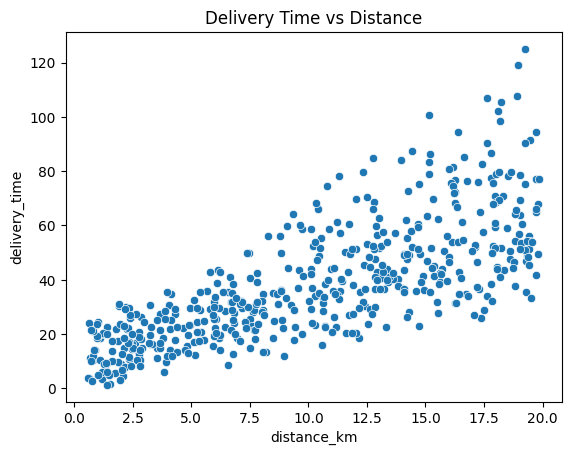

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='distance_km', y='delivery_time', data=df)
plt.title("Delivery Time vs Distance")
plt.show()


## Importing Visualization Libraries

Seaborn and Matplotlib are imported for graphical analysis of delivery patterns.


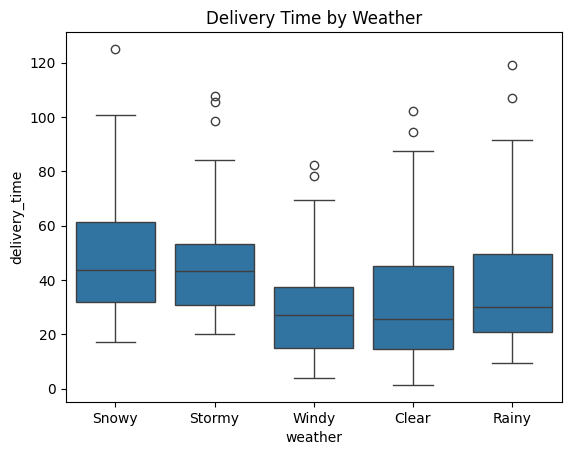

In [19]:
sns.boxplot(x='weather', y='delivery_time', data=df)
plt.title("Delivery Time by Weather")
plt.show()


## Delivery Time Distribution by Weather

A box plot is used to analyze how different weather conditions affect delivery time and identify outliers.


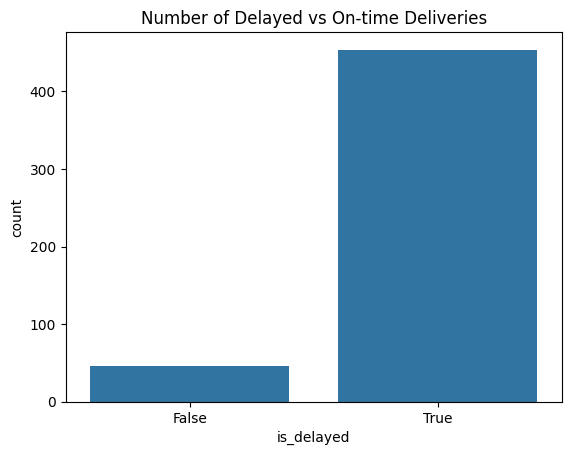

In [20]:
sns.countplot(x='is_delayed', data=df)
plt.title("Number of Delayed vs On-time Deliveries")
plt.show()


## Delayed vs On-Time Deliveries

This visualization shows the proportion of delayed and on-time deliveries.


In [21]:
# Average values
avg_delivery = df['delivery_time'].mean()
avg_expected = df['expected_time'].mean()
percent_delayed = df['is_delayed'].mean() * 100

print(f"Avg delivery time: {avg_delivery:.2f} min")
print(f"Avg expected time: {avg_expected:.2f} min")
print(f"Percentage delayed: {percent_delayed:.2f}%")


Avg delivery time: 38.61 min
Avg expected time: 28.74 min
Percentage delayed: 90.80%


## Average Performance Metrics

This section computes overall average delivery values to support comparison with delayed cases.


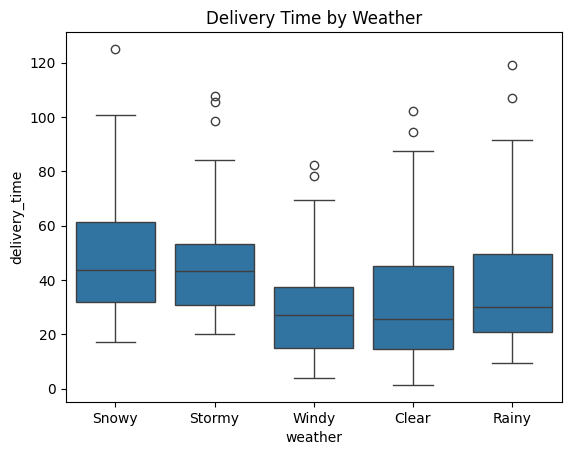

In [22]:
sns.boxplot(x='weather', y='delivery_time', data=df)
plt.title("Delivery Time by Weather")
plt.show()


## City-wise Delivery Time Analysis

This box plot compares delivery time distributions across different cities.
It helps identify cities with consistently higher delivery times and frequent delays.
Outliers indicate extreme delivery cases that require operational attention.


In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(x='City', y='Delivery_Time(min)', data=df)
plt.title('City-wise Delivery Time Distribution')
plt.xticks(rotation=45)
plt.show()



ValueError: Could not interpret value `City` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

## Impact of Traffic Conditions on Delivery Time

This analysis examines how traffic density affects delivery time.
Box plots are used to compare delivery time distributions across different traffic conditions.
Higher medians and wider spreads indicate traffic-induced delays.


In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Traffic', y='Delivery_Time(min)', data=df)
plt.title('Delivery Time by Traffic Conditions')
plt.show()


## Impact of Distance on Delivery Time

Scatter plot shows the relationship between delivery distance and delivery time, highlighting delayed orders.


In [ ]:
sns.scatterplot(x='rider_speed', y='delivery_time', hue='is_delayed', data=df)
plt.title("Delivery Time vs Rider Speed")
plt.show()


## Impact of Rider Speed on Delivery Time

This visualization analyzes how rider speed influences delivery efficiency and delays.


In [ ]:
sns.countplot(x='is_delayed', data=df)
plt.title("Delayed vs On-time Deliveries")
plt.show()


## Peak Hour Delivery Time Analysis

This analysis examines how delivery time varies across different time slots of the day.
Orders are grouped into peak and non-peak hours to identify congestion-related delays.
Peak hours typically correspond to lunch and dinner times when order volume is high.


In [ ]:
# Extract hour from order time
df['order_hour'] = df['Order_Time'].dt.hour

# Define peak and non-peak hours
def classify_hour(hour):
    if (12 <= hour <= 14) or (19 <= hour <= 21):
        return 'Peak Hours'
    else:
        return 'Non-Peak Hours'

df['Time_Slot'] = df['order_hour'].apply(classify_hour)

# Box plot for delivery time by time slot
plt.figure(figsize=(7,6))
sns.boxplot(x='Time_Slot', y='Delivery_Time(min)', data=df)
plt.title('Delivery Time During Peak vs Non-Peak Hours')
plt.show()



## Longest Delivery Times

Top 5 orders with the highest delivery time are displayed to identify extreme delay cases.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2,2, figsize=(12,10))

# 1. Delivery vs Distance
sns.scatterplot(x='distance_km', y='delivery_time', hue='is_delayed', data=df, ax=axes[0,0])
axes[0,0].set_title("Delivery Time vs Distance")

# 2. Boxplot by weather
sns.boxplot(x='weather', y='delivery_time', data=df, ax=axes[0,1])
axes[0,1].set_title("Delivery Time by Weather")

# 3. Delayed count
sns.countplot(x='is_delayed', data=df, ax=axes[1,0])
axes[1,0].set_title("Delayed vs On-time")

# 4. Avg vs Expected (bar)
avg_df = df[['delivery_time','expected_time']].mean().reset_index()
avg_df.columns = ['Metric','Minutes']
axes[1,1].bar(avg_df['Metric'], avg_df['Minutes'], color=['skyblue','salmon'])
axes[1,1].set_title("Average Delivery vs Expected Time")

plt.tight_layout()
plt.show()


## Conclusion

- Delays are influenced by distance, weather, and rider speed  
- Expected delivery time provides a useful benchmark  
- Certain conditions consistently result in longer delivery times  

### Recommendations:
- Improve rider allocation during adverse weather  
- Optimize routes for long-distance orders  
- Monitor rider speed and efficiency
